## Titanic Dataset - Comprehensive Practice Exercises

### 📊 Data Source & Quick Setup

In [4]:
import pandas as pd 

In [5]:
titanic = pd.read_csv("../DATA/titanic.csv")

titanic.head(1)
# titanic.info()
# titanic.shape

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


### Exercise 1.2: Data Cleaning Fundamentals
```python
"""
1. Handle missing values:
   - Fill missing 'Age' values with the median age
   - Fill missing 'Embarked' with the most frequent value
   - Drop the 'Cabin' column (too many missing values)
"""

In [6]:
titanic['Age'] = titanic['Age'].fillna(titanic['Age'].median())

titanic['Age'].head()

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: Age, dtype: float64

In [7]:
titanic['Embarked'] = titanic['Embarked'].fillna(titanic['Embarked'].mode())

titanic['Embarked'].head(5)

0    S
1    C
2    S
3    S
4    S
Name: Embarked, dtype: object

In [8]:
handling = titanic.drop(columns=['Cabin'])

handling.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S



3. Convert 'Sex' to numerical values (male: 0, female: 1)


In [9]:
bool_sex = {'male':0, 'female':1} 

In [10]:
def my_func(x):
    return bool_sex[x]

handling['sex'] = handling['Sex'].map(my_func)

handling.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,sex
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,S,0


In [11]:
handling.drop(columns=['Sex']).head(1)

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Embarked,sex
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.25,S,0


2. Create a new column 'FamilySize' = SibSp + Parch + 1

In [12]:
handling['FamilySize'] = handling['SibSp'] + handling['Parch'] + 1

handling['FamilySize'].head()

0    2
1    2
2    1
3    2
4    1
Name: FamilySize, dtype: int64

In [14]:
handling.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,sex,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0,1


In [13]:
handling.drop(columns=['SibSp', 'Parch']).head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,sex,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,S,0,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C,1,2


4. Create age groups: Child (0-12), Teen (13-19), Adult (20-59), Senior (60+)

In [15]:
handling['age group'] = handling['Age'].apply(
    lambda x: 'Child' if x <= 12 
    else 'Teen' if 13 <= x <= 19 
    else 'Adult' if 20 <= x <= 59 
    else 'Senior'
)
handling.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,sex,FamilySize,age group
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0,2,Adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1,2,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1,1,Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1,2,Adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0,1,Adult


### Exercise 1.3: Basic Analysis
```python
"""
1. What is the overall survival rate?
"""

In [16]:
handling['Survived_overall'] = handling['Survived'].sum()

print(handling['Survived_overall'].max())

342


2. How many passengers were in each class?

In [17]:
passg_per_class = handling.groupby('Pclass', as_index=False)['PassengerId'].sum()
print(passg_per_class.sort_values('PassengerId', ascending=False).head(3))

   Pclass  PassengerId
2       3       215625
0       1        99705
1       2        82056


3. What is the average age of passengers?

In [18]:
import numpy as np
avg_age_of_passengers = np.average(handling['Age'])

print(f"The average age of passengers is: {avg_age_of_passengers}")
print(f"The average age of passengers is: {avg_age_of_passengers:.2f}")

The average age of passengers is: 29.36158249158249
The average age of passengers is: 29.36


4. Which embarkation port had the most passengers?

In [19]:
embarkation = handling.groupby('Embarked', as_index=False)['PassengerId'].sum()
most_embark = embarkation.sort_values('PassengerId', ascending=False)
print("The embarkation port with the most passengers\n", most_embark)

The embarkation port with the most passengers
   Embarked  PassengerId
2        S       289496
0        C        74820
1        Q        32178


## 🟡 Level 2: Intermediate Analysis & Visualization

### Exercise 2.1: Demographic Analysis
```python
"""
1. Analyze survival by gender:
   - What percentage of women survived?
   - What percentage of men survived?
   - Create a bar chart comparing survival rates by gender

In [20]:

surv_by_gender = handling.groupby('Sex', as_index=False)['Survived'].sum()

prct_women = (surv_by_gender['Survived'][0]/surv_by_gender['Survived'].sum())*100
prct_men = (surv_by_gender['Survived'][1]/surv_by_gender['Survived'].sum())*100

print(f"The percentage of women survived is: {prct_women:.2f}%")
print(f"The percentage of men survived is: {prct_men:.2f}%")

The percentage of women survived is: 68.13%
The percentage of men survived is: 31.87%


In [21]:
surv_by_gender

,Sex,Survived
0,female,233
1,male,109


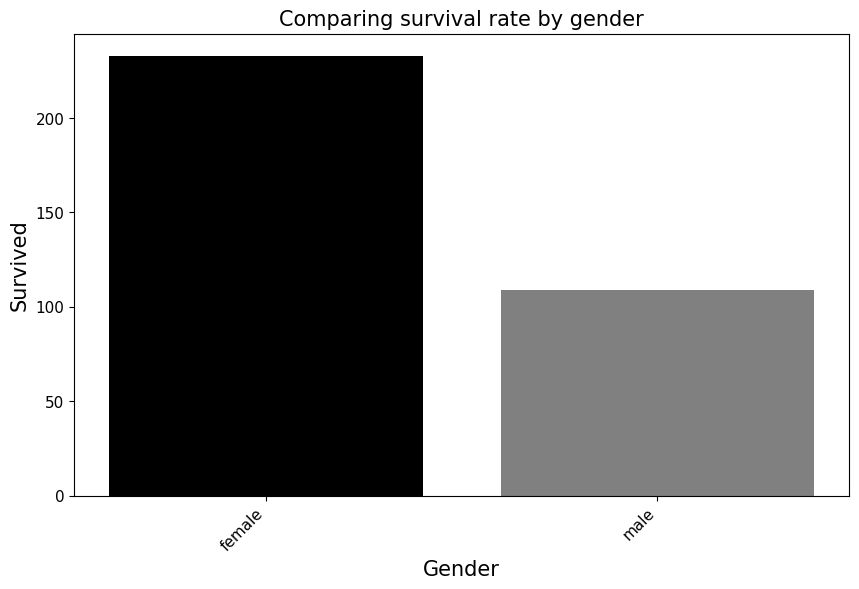

In [35]:
import matplotlib.pyplot as plt

# surv_both.plot.bar(title='Comparing Survival rate by gender', y='survived', x="gender")
plt.figure(figsize=(10,6))
plt.bar(surv_by_gender.Sex, surv_by_gender.Survived, color=['Black', 'Grey'])
plt.xlabel("Gender", fontsize=15)
plt.ylabel("Survived", fontsize=15)
plt.title("Comparing survival rate by gender", fontsize=15)
plt.xticks(rotation=45, ha='right', fontsize=11)
plt.yticks(fontsize=11)
plt.show()



2. Analyze survival by passenger class:
   - Calculate survival rates for each class
   - Visualize with a stacked bar chart
   - Which class had the highest survival rate?

In [93]:
surv_by_pclass = handling.groupby('Pclass', as_index=False)['Survived'].sum()

In [94]:
surv_by_pclass

,Pclass,Survived
0,1,136
1,2,87
2,3,119


In [95]:
rename = {1:"Firstclass", 2:"Secondclass", 3:"Thirdclass"}

def my_renmane(x):
    return rename(x)
surv_by_pclass["pclass"] = surv_by_pclass["Pclass"].map(rename) 
surv_by_pclass

,Pclass,Survived,pclass
0,1,136,Firstclass
1,2,87,Secondclass
2,3,119,Thirdclass


In [96]:
surv_by_pclass.drop(columns=['Pclass'])

,Survived,pclass
0,136,Firstclass
1,87,Secondclass
2,119,Thirdclass


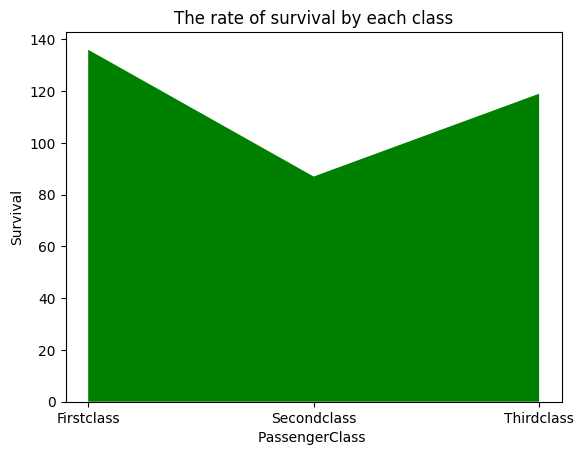

In [97]:
# plt.bar(surv_by_pclass.Pclass, surv_by_pclass.Survived)
plt.stackplot(surv_by_pclass.pclass, surv_by_pclass.Survived, colors="green")
plt.title("The rate of survival by each class")
plt.xlabel("PassengerClass ")
plt.ylabel("Survival")
plt.show()

In [98]:
class_1 = (surv_by_pclass['Survived'][0]/surv_by_pclass['Survived'].sum())*100
class_2 = (surv_by_pclass['Survived'][1]/surv_by_pclass['Survived'].sum())*100
class_3 = (surv_by_pclass['Survived'][2]/surv_by_pclass['Survived'].sum())*100

print(f"The rate of passengers that survived the Firstclass: {class_1:.2f}%")
print(f"The rate of passengers that survived the Secondclass: {class_2:.2f}%")
print(f"The rate of passengers that survived the Thirdclass: {class_3:.2f}%")

The rate of passengers that survived the Firstclass: 39.77%
The rate of passengers that survived the Secondclass: 25.44%
The rate of passengers that survived the Thirdclass: 34.80%


3. Age analysis:
   - What is the average age of survivors vs non-survivors?
   - Create a histogram of ages for survivors and non-survivors

In [99]:
avg_age = handling.groupby("Survived", as_index=False)["Age"].mean()

avg_age.columns = ['Survival Status', 'Average Age']

avg_age

,Survival Status,Average Age
0,0,30.028233
1,1,28.291433


In [100]:
surv_rename = {0: "Survivors", 1: "Non Survivors"}

def surv_func(x):
    return surv_rename(x)

avg_age["Survival Status"] = avg_age["Survival Status"].map(surv_rename)

avg_age

,Survival Status,Average Age
0,Survivors,30.028233
1,Non Survivors,28.291433


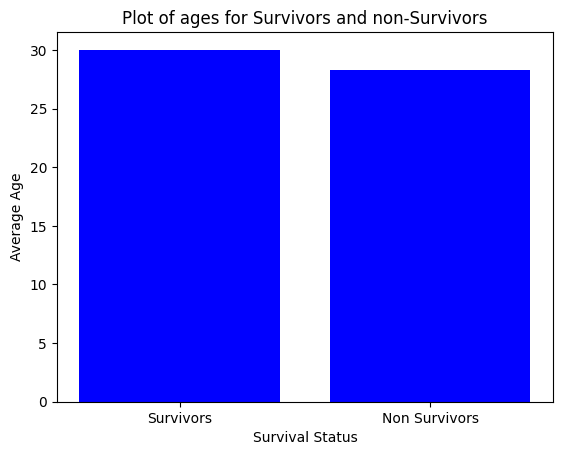

In [101]:
# import seaborn as sns 

plt.bar(avg_age['Survival Status'], avg_age['Average Age'], color='blue')
plt.ylabel("Average Age")
plt.xlabel("Survival Status")
plt.title("Plot of ages for Survivors and non-Survivors")
plt.show()

In [102]:
handling.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,sex,FamilySize,age group,Survived_overall
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0,2,Adult,342
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1,2,Adult,342
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1,1,Adult,342


### Exercise 2.2: Family & Fare Analysis
```python
"""
1. Family size impact:
   - Create family size categories: Alone, Small (2-4), Large (5+)
   - Calculate survival rate for each family size category
   - Does traveling with family increase survival chances?

In [103]:
handling["FamilySize Categories"] = handling['FamilySize'].apply(
    lambda x: "Alone" if x <= 1
    else "Small" if 2 <= x <=4 
    else "Large"
)

handling.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,sex,FamilySize,age group,Survived_overall,FamilySize Categories
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,S,0,2,Adult,342,Small


In [104]:
surv_rate = handling.groupby("FamilySize Categories", as_index=False)["Survived"].sum()
Survivalrate = surv_rate.sort_values('Survived', ascending=False).head()

Survivalrate

,FamilySize Categories,Survived
2,Small,169
0,Alone,163
1,Large,10


2. Fare analysis:
   - What is the average fare for each passenger class?
   - Create fare categories: Low (<10), Medium (10-50), High (>50)
   - Analyze survival rates by fare categories

In [105]:
Avg_pssg_fare = handling.groupby("Pclass", as_index=False)["Fare"].mean()

Avg_pssg_fare

,Pclass,Fare
0,1,84.154687
1,2,20.662183
2,3,13.675550


In [110]:
handling["Fare Categories"] = handling["Fare"].apply(
    lambda x: "Low" if x < 10
    else "Medium" if 10 <= x <= 50
    else "High"
)

handling.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,sex,FamilySize,age group,Survived_overall,FamilySize Categories,Fare Categories
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,S,0,2,Adult,342,Small,Low


In [ ]:
surv_by_fare = handling.groupby("Fare Categories", as_index=False)["Survived"].sum()

surv_by_fare.head()

,Fare Categories,Survived
0,High,109
1,Low,67
2,Medium,166


3. Combined factors:
   - Find survival rate for women in 1st class vs men in 3rd class
   - What was the survival rate for children in each class?
"""

In [ ]:
survived_yes = [yes for yes in handling["Survived"] if yes==1]
survived_no = [no for no in handling["Survived"] if no == 0]



TypeError: list.count() takes exactly one argument (0 given)

In [44]:
survival =pd.DataFrame({"Yes": survived_yes})

In [45]:
survival

,Yes
0,1
1,1
2,1
3,1
4,1
...,...
337,1
338,1
339,1
340,1
